In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df_main=pd.read_csv("googleplaystore.csv")
df=df_main.copy()

In [85]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [41]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [42]:
df.dropna(subset=["Current Ver"], inplace=True)
df.dropna(subset=["Content Rating"], inplace=True)
df.dropna(subset=["Android Ver"], inplace=True)
df.dropna(subset=["Type"], inplace=True)

In [43]:
df["Reviews"]=df["Reviews"].astype(float)


In [44]:
df["Size"] = df["Size"].replace("M", "", regex=True)
df["Size"] = df["Size"].replace("Varies with device", np.nan)
df["Size"] = df["Size"].replace("k", "", regex=True)
# df["Size"]=df["Size"].replace("201k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("23k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("79k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("118k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("695k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("18k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("526k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("334k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("18k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("8.5k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("41k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("292k",np.nan,regex=True)
df["Size"]=df["Size"].astype(float)

In [45]:
df["Installs"]=df["Installs"].replace(r"\+","",regex=True)
df["Installs"]=df["Installs"].replace(",","",regex=True)
df["Installs"]=df["Installs"].astype(int)



In [46]:
df["Price"]=df["Price"].str.replace("$","").astype(float)

In [47]:
df["Content Rating"].isnull().sum()

np.int64(0)

In [48]:
df["Genres"].isnull().sum()

np.int64(0)

In [49]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [50]:
df["Current Ver"] = df["Current Ver"].str.extract(r'(\d+\.\d+)').astype(float)

In [51]:
df["Android Ver"] = df["Android Ver"].str.extract(r'(\d+\.\d+)').astype(float)

In [52]:
df["Android Ver"].isna().sum()

np.int64(1361)

In [53]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0], inplace=True)
df["Android Ver"].isna().sum()

<ipython-input-53-50aead3b7fdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Android Ver"].fillna(df["Android Ver"].mode()[0], inplace=True)


np.int64(0)

In [54]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0], inplace=True)
df["Current Ver"].isnull().sum()


<ipython-input-54-0a34563e9a1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Current Ver"].fillna(df["Current Ver"].mode()[0], inplace=True)


np.int64(0)

In [55]:
df["Current Ver"]

0        1.00
1        2.00
2        1.20
3        1.00
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839    1.00
10840    1.00
Name: Current Ver, Length: 10829, dtype: float64

In [56]:
df["Current Ver"] = pd.to_numeric(df["Current Ver"], errors="coerce")  
df = df[df["Current Ver"] <= 10]
    

In [57]:
df["Current Ver"].max()

np.float64(10.0)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          9033 non-null   float64       
 3   Reviews         10449 non-null  float64       
 4   Size            8785 non-null   float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 898.0+ KB


In [59]:
df.Rating.max()

np.float64(5.0)

In [60]:
df.Rating.fillna(df.Rating.mode()[0],inplace=True)
df.Rating

<ipython-input-60-ac9405d7a28e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Rating.fillna(df.Rating.mode()[0],inplace=True)


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.4
10839    4.5
10840    4.5
Name: Rating, Length: 10449, dtype: float64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          10449 non-null  float64       
 3   Reviews         10449 non-null  float64       
 4   Size            8785 non-null   float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 898.0+ KB


In [62]:
df.Size.fillna(df.Size.mean(),inplace=True)
df.info()

<ipython-input-62-04edfc36e243>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Size.fillna(df.Size.mean(),inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          10449 non-null  float64       
 3   Reviews         10449 non-null  float64       
 4   Size            10449 non-null  float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 898.0+ KB


In [63]:
#all columns has been fixed 

In [64]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


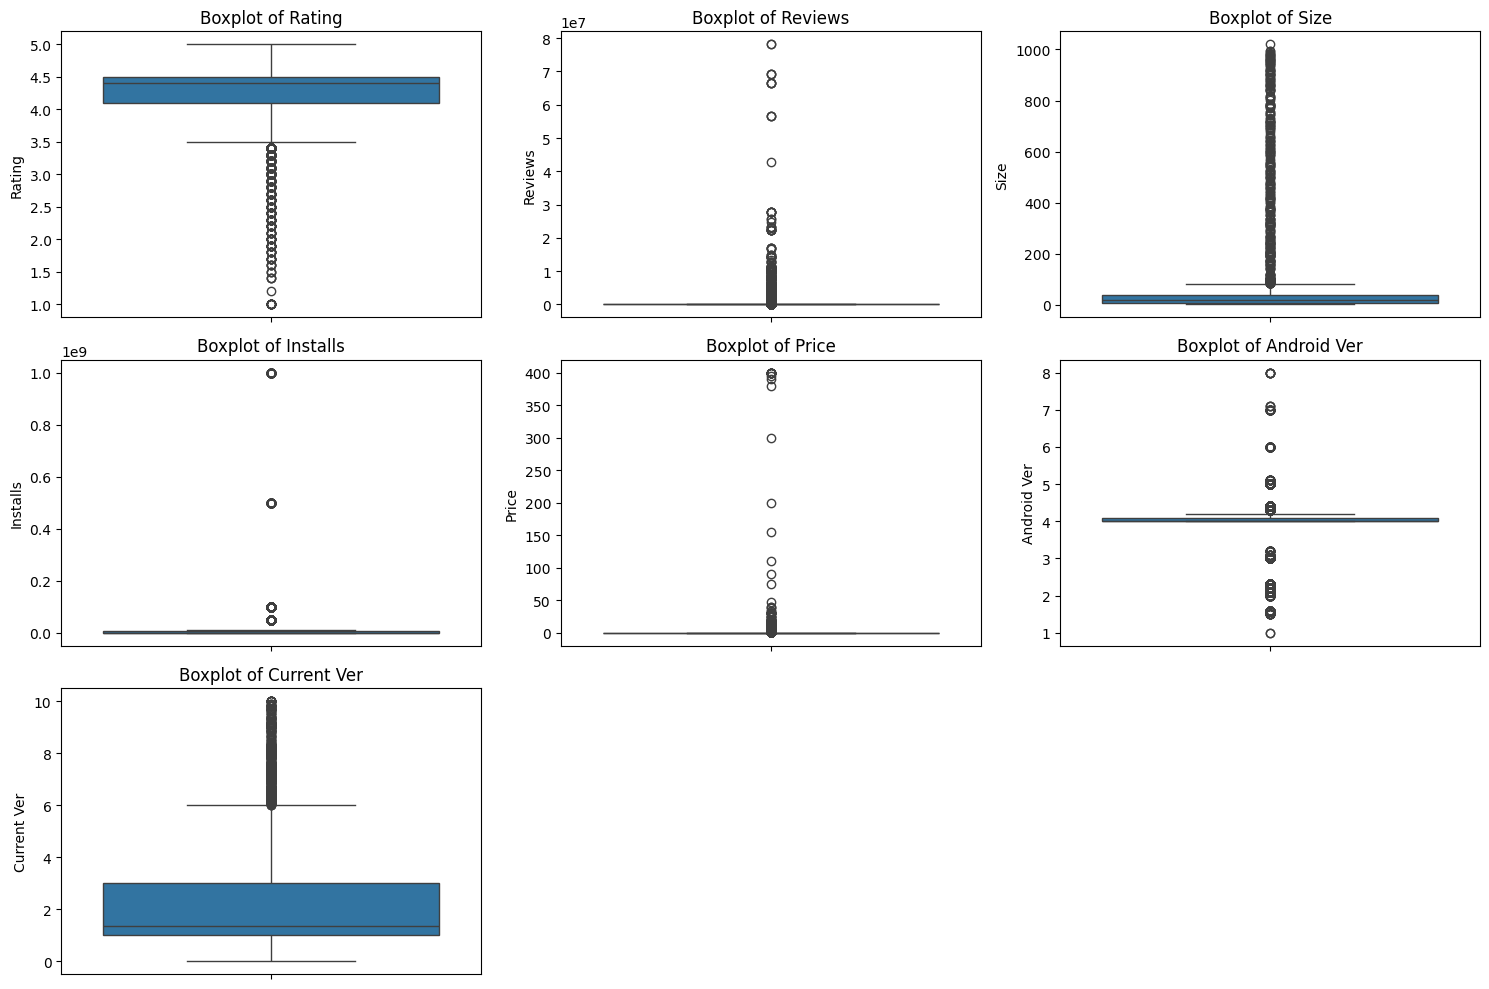

In [65]:
#detecting the outlier
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  
numeric_columns = ["Rating", "Reviews", "Size", "Installs", "Price", "Android Ver", "Current Ver"]
for ax, col in zip(axes.flatten(), numeric_columns):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

for i in range(len(numeric_columns), 9):  
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [66]:
df["Last Updated"].max()

Timestamp('2018-08-08 00:00:00')

visualizing the distribution of the size column


<ipython-input-67-f2cddf3ef16d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Size)


<Axes: xlabel='Size', ylabel='Density'>

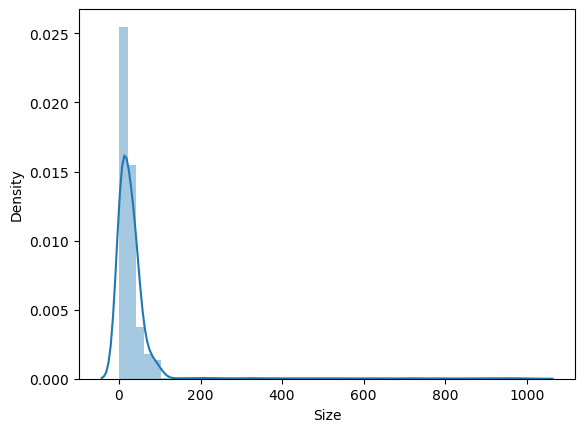

In [67]:
sns.distplot(df.Size)

It Seems that there is a normal distribution 
most of the data plotted between 0 to 100
lets compare the size with the rating column

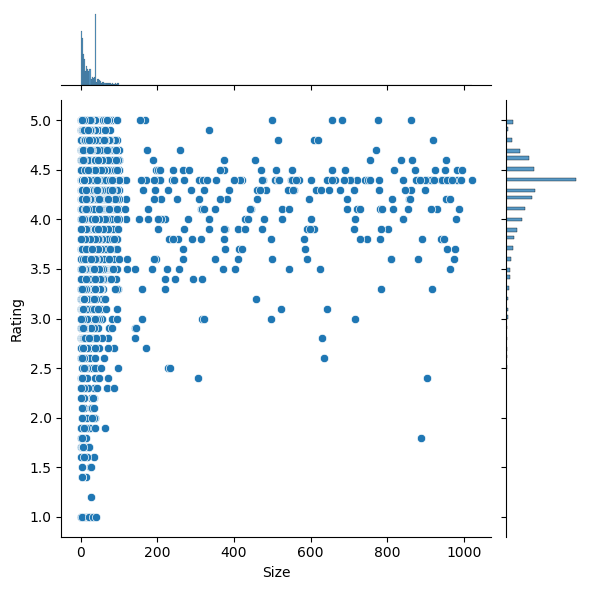

In [68]:
sns.jointplot(x=df.Size,y=df.Rating)

the applications with a big size has a high rating so the size has an effect on the rating column

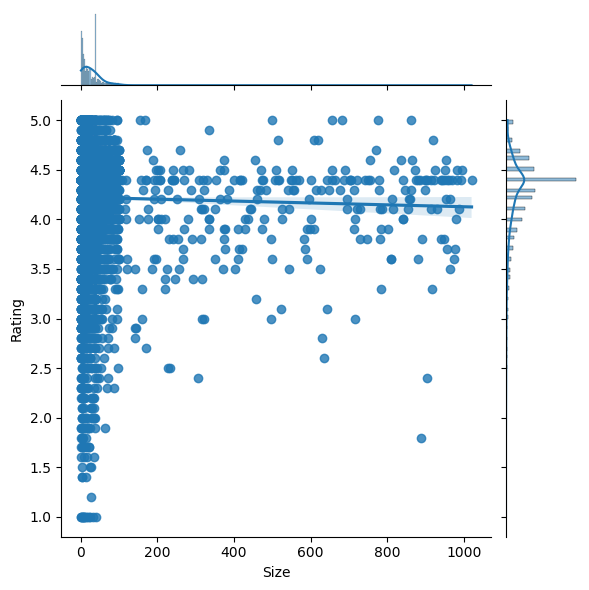

In [69]:
sns.jointplot(x=df.Size,y=df.Rating,kind="reg")

most of the applications witha high size have a high Rating or we can say that the applications with a small size the potential of having a high rate for them is week

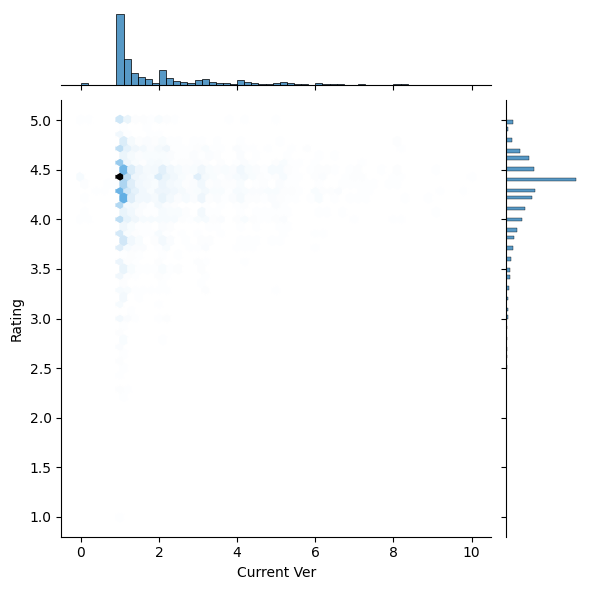

In [70]:
sns.jointplot(x=df["Current Ver"],y=df.Rating,kind="he")

the version doesn't have a huge impact on the rating columns

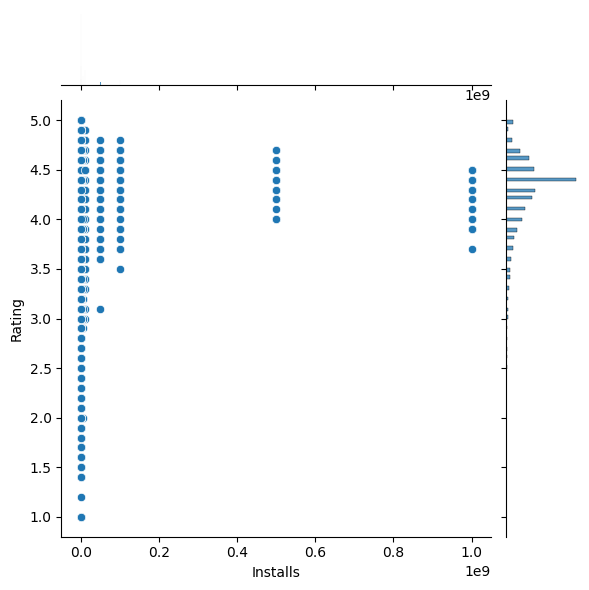

In [73]:
sns.jointplot(x=df.Installs,y=df.Rating)

Visualizing the categroical data

<ipython-input-82-50f6b31a061e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category"], y=df["Installs"],palette="coolwarm")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

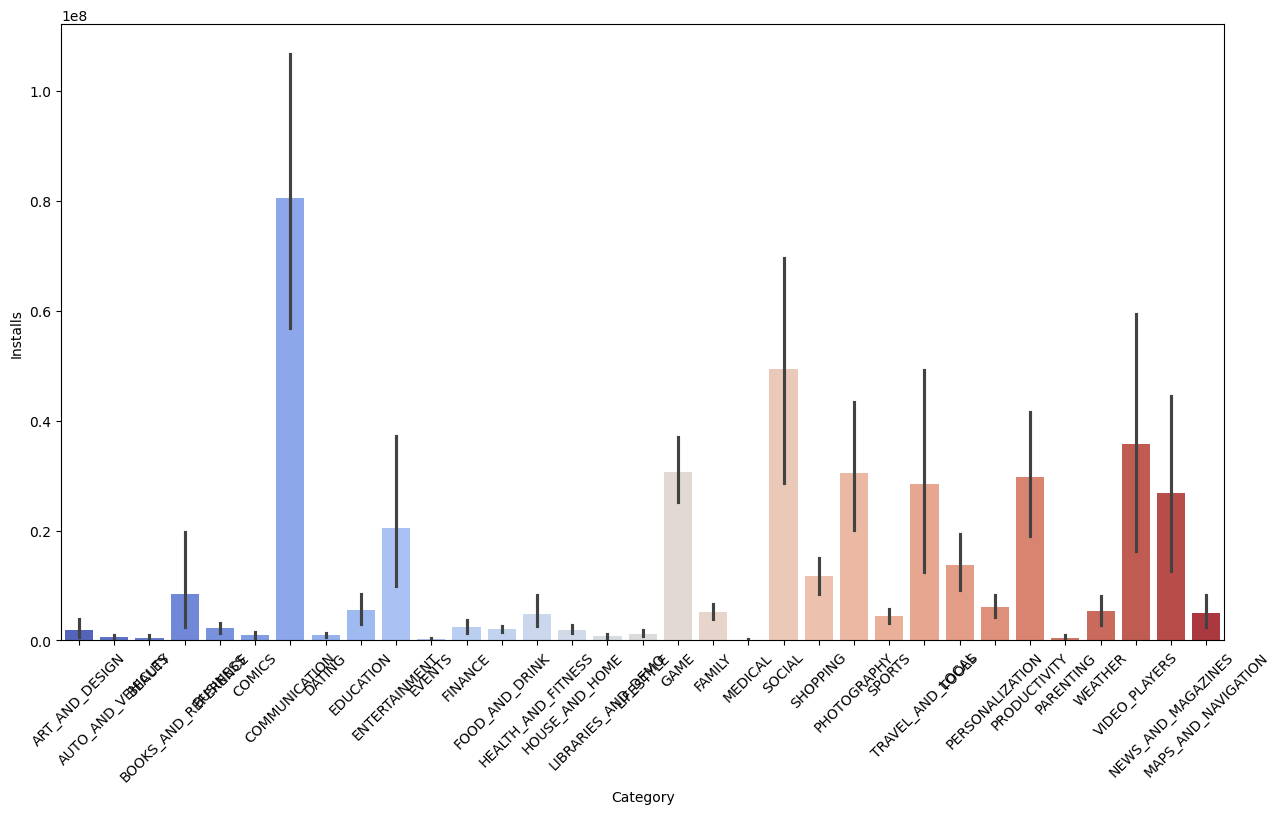

In [82]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df["Category"], y=df["Installs"],palette="coolwarm")
plt.xticks(rotation=45)


From this data, I observed that applications in the Communication, Social, Games, and Weather categories have the highest number of installations

<ipython-input-87-0e11fbf7ba05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Category"],palette="coolwarm")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

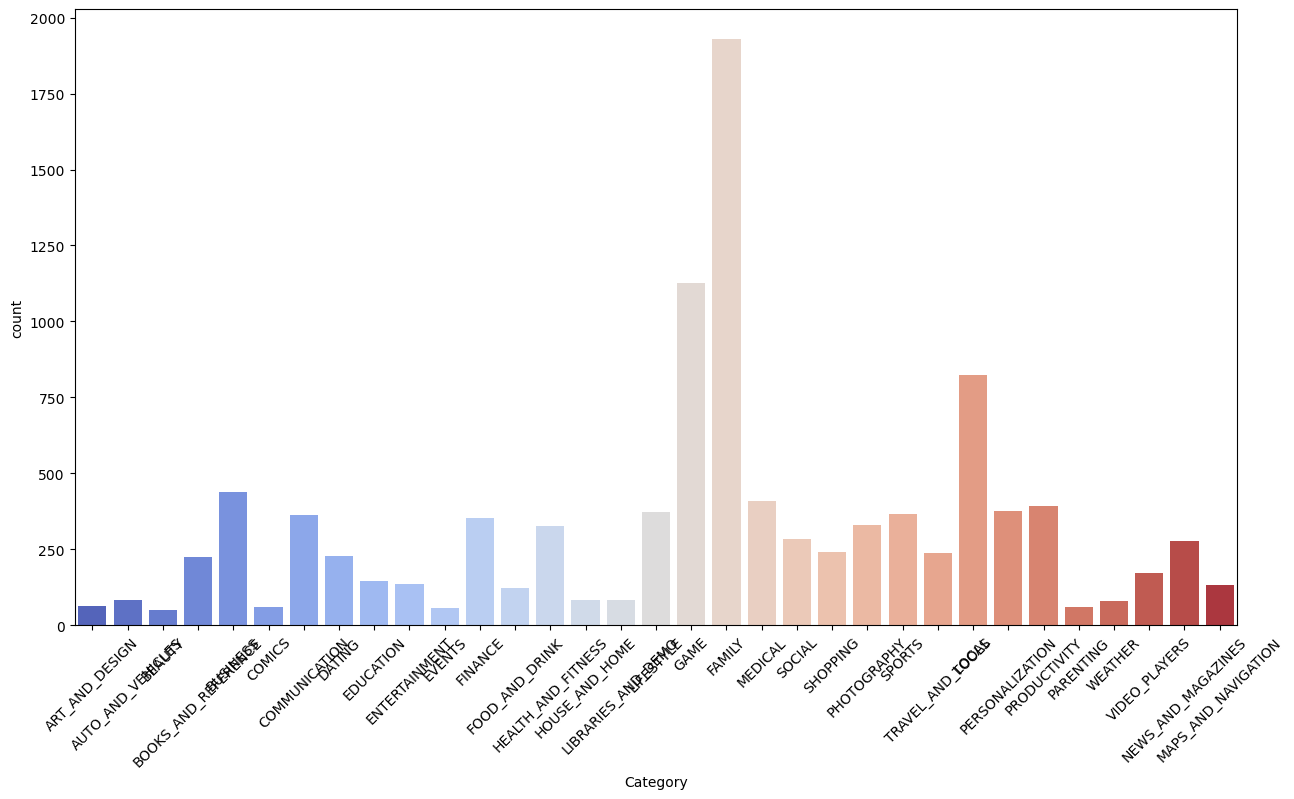

In [87]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Category"],palette="coolwarm")
plt.xticks(rotation=45)

Categories with the Highest Downloads (Installs):

The Family and Game categories have the highest number of downloads on Google Play.
The Shopping category has a moderate number of downloads.
The Medical category has slightly above-average downloads.
The Travel category has an unclear trend but seems to have some level of downloads.
Categories with the Lowest Downloads (Installs):

The Productivity category has the lowest number of downloads, possibly indicating a lack of user interest.
Auto & Vehicles, Books & References, and Finance have relatively low downloads but are not at the absolute minimum.
The House & Home category has very low downloads.
Health & Fitness also has low downloads, suggesting a lack of user engagement in health-related apps.
Categories with the Highest Ratings:

The Communication, Games, Medical, Video Players, and Weather categories have the highest user ratings.

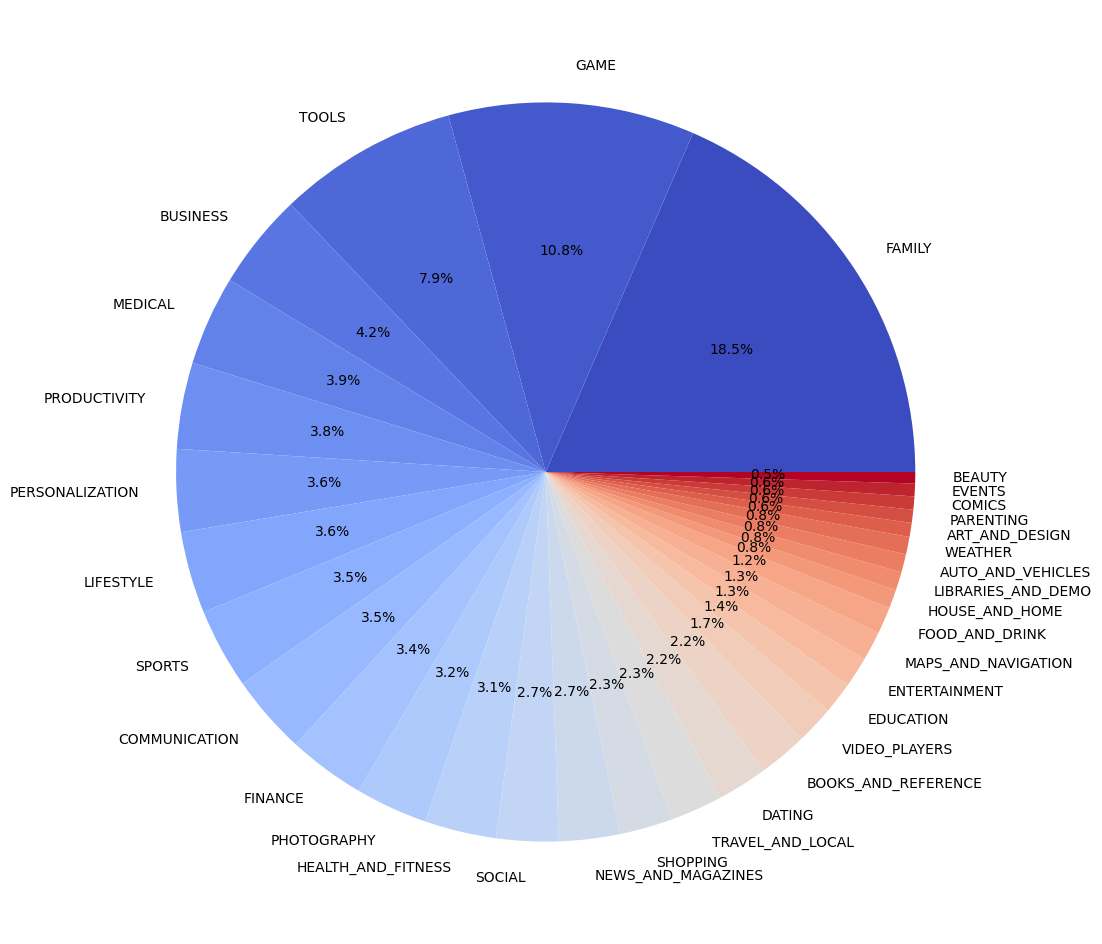

In [90]:
category_counts = df["Category"].value_counts()
plt.figure(figsize=(20, 12))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=plt.cm.coolwarm(np.linspace(0, 1, len(category_counts))))
plt.show()

In [91]:
df.rename(columns={"Content Rating": "AGE CAT"}, inplace=True)


In [92]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,AGE CAT,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


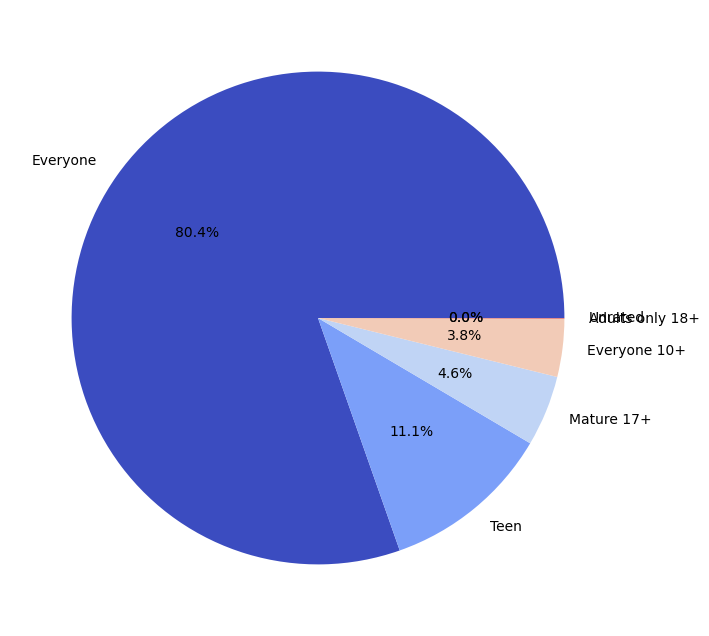

In [99]:
category_counts = df["AGE CAT"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=plt.cm.coolwarm(np.linspace(0, 1, len(category_counts))))
plt.show()

<ipython-input-102-7b868c59e37e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Genres"].value_counts().index, x=df["Genres"].value_counts().values, palette="coolwarm")


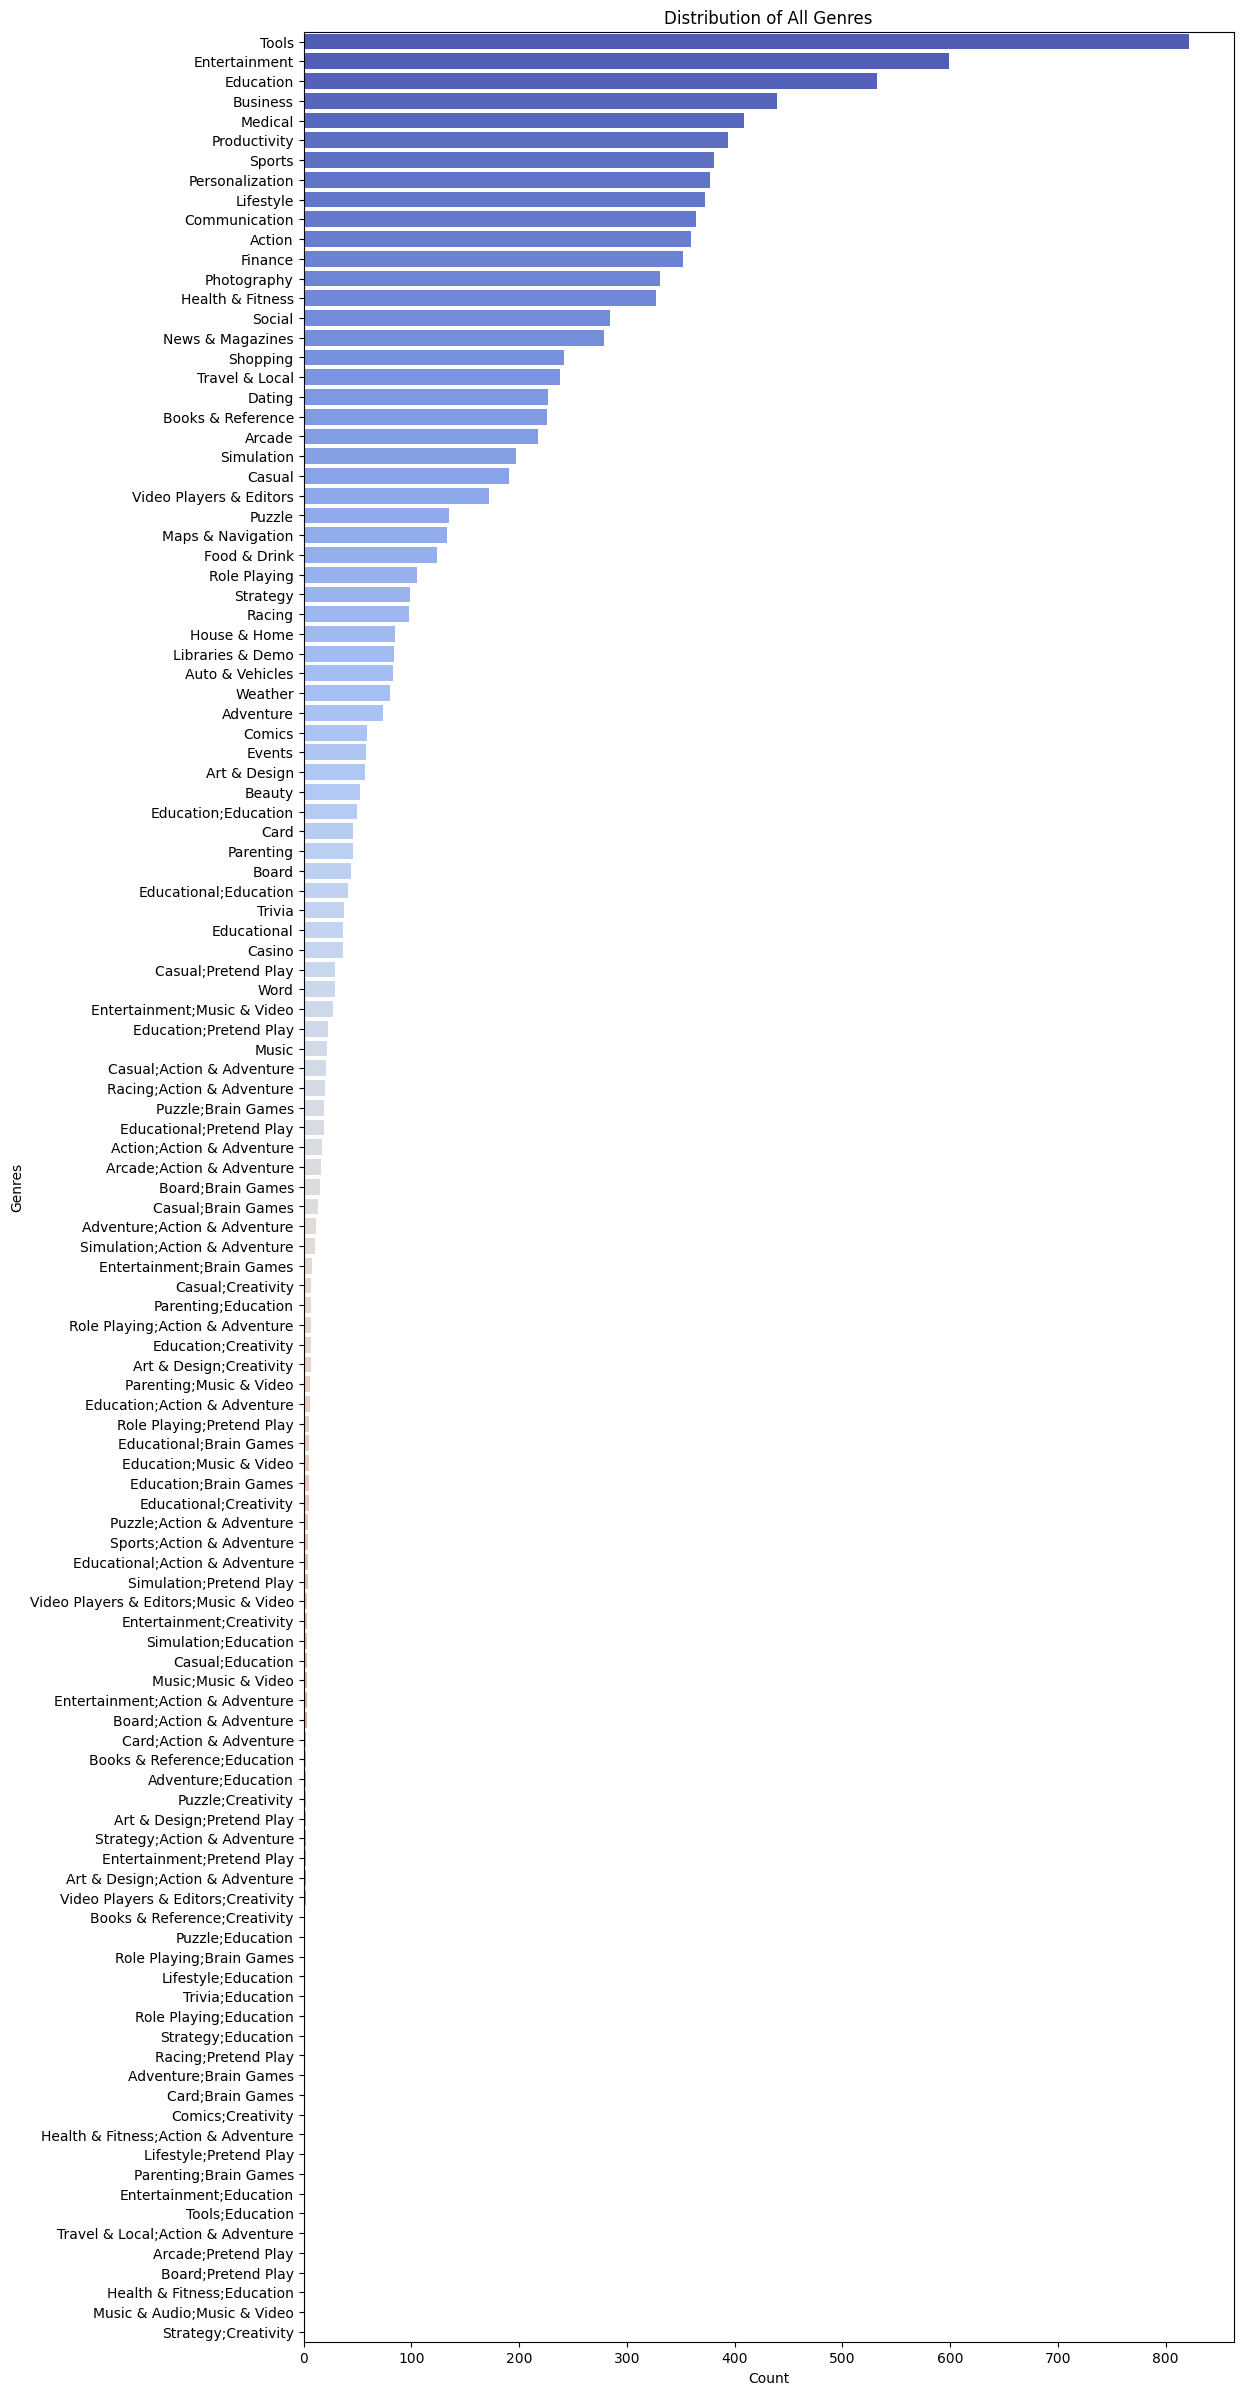

In [102]:
plt.figure(figsize=(12, 30))  # زيادة الطول لجعل الرسم أوضح
sns.barplot(y=df["Genres"].value_counts().index, x=df["Genres"].value_counts().values, palette="coolwarm")

plt.ylabel("Genres")
plt.xlabel("Count")
plt.title("Distribution of All Genres")

plt.show()

Most Frequent Genres in Google Play Store
Based on the categorical analysis, the most frequently occurring Genres in the dataset are:

Tools → Appears approximately 800 to 1,000 times, making it the most common genre.
Entertainment → Occurs between 700 to 800 times, ranking second.
Business → The third most frequent genre, with 600 to 700 occurrences.
Medical, Productivity, and Sports follow closely in frequency.
Other notable genres include Personalization, Lifestyle, Communication, Action, Finance, Photography, and Health & Fitness.
These insights highlight that utility-based applications (Tools, Business, and Productivity) and entertainment-related apps (Entertainment, Sports, and Photography) dominate the store, suggesting strong user demand in these categories.

<Axes: >

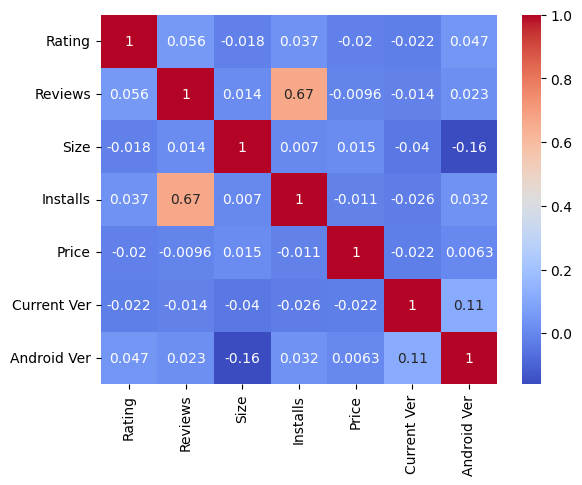

In [105]:
df_numeric = df.select_dtypes(include=["number"])
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True)


Overall Insights from Google Play Store Data Analysis
1️⃣ Most Downloaded Categories:
The Family and Game categories have the highest number of downloads, indicating strong user interest in entertainment and child-friendly applications.
Other notable categories with high installs include Tools and Communication.
2️⃣ Least Downloaded Categories:
Productivity, Auto & Vehicles, Books & References, Finance, House & Home, and Health & Fitness have relatively low install counts.
This suggests that users may prioritize entertainment and social interaction over productivity-related apps.
3️⃣ Categories with the Highest Ratings:
Communication, Game, Medical, Video Players, and Weather apps tend to receive the highest average ratings.
This could indicate strong user engagement and satisfaction in these areas.
4️⃣ Most Frequent Genres (Based on Categorical Analysis):
The most common genres in the dataset are:
Tools (800-1,000 occurrences)
Entertainment (700-800)
Business (600-700)
Other frequently appearing genres: Medical, Productivity, Sports, Personalization, Lifestyle, Communication, Action, Finance, Photography, and Health & Fitness.
This suggests that utility-based applications (Tools, Business, and Productivity) and entertainment-related apps (Entertainment, Sports, and Photography) dominate the store.
5️⃣ Correlation Analysis (Heatmap Insights):
✅ Strong Positive Correlation:

Number of Installs and Reviews (0.67) → Highly downloaded apps receive more reviews.
✅ Weak or No Significant Correlation:
Ratings do not have a strong correlation with installs, price, or size, meaning higher downloads don’t necessarily mean higher ratings.
✅ Negative Correlation:
App Size and Android Version (-0.16) → Larger apps may not be as compatible with older Android versions.
Installs and Price (-0.011) → Paid apps tend to have fewer downloads compared to free apps.
📌 Key Takeaways:
Entertainment and utility apps dominate downloads and availability, reflecting strong user interest.
Productivity and finance-related apps have lower user engagement.
High installs don’t necessarily mean high ratings, indicating that download volume is not always linked to user satisfaction.
Paid apps generally receive fewer installs compared to free apps.
Larger apps may face compatibility issues with older Android versions.
